Description:

The purpose of this notebook is to be used as a playground for analyzing weather and sensor data. 


This notebook allows you to load 2 datasets (any 2 that you choose).
It will display the raw, unfiltered tabular data. 
It will display the data in intervals of 20 minutes.
It will also plot 2 curves that you choose using Matplotlib near the end of the notebook. 

In [1]:
import pandas as pd
import sys
import datetime

In [2]:
set1 = pd.read_csv('data/WEATHER1-Sept-26-2018 7-25pm.CSV')
set2 = pd.read_csv('data/WEATHER1-Sept-28-2018 7-00pm.CSV')
set3 = pd.read_csv('data/WEATHER1-Sept-30-2018 7-00pm.CSV')
set4 = pd.read_csv('data/WEATHER1-Oct-03-2018 7-45 pm.CSV')


# Humidity: Relative Humidity in %
# Temperature: Temperature in *C
# Moisture: Volumetric Water Content of Soil
# Moisture after Watering: -1 if garden was not watered. If not -1, then this is the Volumetric Water Content after watering the garden
# Light: The smaller the value, the more sunlight there is
# Datetime: Time of recording data
COLUMNS = ['Humidity', 'Temperature', 'Moisture', 'Moisture after Watering', 'Light', 'Datetime']
set1.columns = COLUMNS
set2.columns = COLUMNS
set3.columns = COLUMNS
set4.columns = COLUMNS

In [3]:
set1

,Humidity,Temperature,Moisture,Moisture after Watering,Light,Datetime
0,69.2,13.5,48.42,-1,32202.80,01-01-1970.00:00
1,77.9,15.0,49.57,-1,56725.07,01-01-1970.00:01
2,78.6,15.0,49.56,-1,56725.07,01-01-1970.00:02
3,79.0,15.0,49.64,-1,56725.07,01-01-1970.00:02
4,78.1,15.0,49.59,-1,57085.82,01-01-1970.00:03
5,78.0,15.0,49.56,-1,58528.82,01-01-1970.00:04
6,77.5,15.0,49.55,-1,56725.07,01-01-1970.00:04
7,77.0,15.0,49.52,-1,58168.07,01-01-1970.00:05
8,76.8,15.0,49.57,-1,59611.07,01-01-1970.00:06
9,76.6,15.3,49.55,-1,59250.32,01-01-1970.00:06


Display a table of all data in 20-minute intervals.

In [4]:
# Select only data collected in intervals of 20 minutes
# Put the relevant datasets into set1_cleansed
set1_cleansed = pd.DataFrame(columns=COLUMNS)
set2_cleansed = pd.DataFrame(columns=COLUMNS)
set3_cleansed = pd.DataFrame(columns=COLUMNS)
set4_cleansed = pd.DataFrame(columns=COLUMNS)


# Append the first row of relevant data, which is the first entry in set1
set1_cleansed = set1_cleansed.append(set1.iloc[0])
set2_cleansed = set2_cleansed.append(set2.iloc[0])
set3_cleansed = set3_cleansed.append(set3.iloc[0])
set4_cleansed = set4_cleansed.append(set4.iloc[0])


tracker_associate = {0: '00', 1: '20', 2: '40'}

all_datasets = (set1, set2, set3, set4)
all_cleansed_datasets = [set1_cleansed, set2_cleansed, set3_cleansed, set4_cleansed]

for j in range(len(all_datasets)):
    tracker_index = 1
    for i in range(len(all_datasets[j])):
        row = all_datasets[j].iloc[i]

        if row['Datetime'][-2:] == tracker_associate[tracker_index%3]:
            all_cleansed_datasets[j] = all_cleansed_datasets[j].append(row)
            tracker_index += 1

all_cleansed_datasets[2]

,Humidity,Temperature,Moisture,Moisture after Watering,Light,Datetime
0,82.0,15.0,46.40,-1,16845.75,01-01-1970.00:01
27,83.0,15.0,46.28,-1,56725.07,01-01-1970.00:20
56,80.0,15.0,46.31,-1,68159.14,01-01-1970.00:40
85,78.0,15.0,46.29,-1,68626.40,01-01-1970.01:00
114,76.0,15.0,47.01,-1,41489.90,01-01-1970.01:20
142,81.2,14.0,47.08,-1,38254.65,01-01-1970.01:40
171,85.3,14.0,47.35,-1,38418.19,01-01-1970.02:00
200,87.2,14.0,47.53,-1,39562.98,01-01-1970.02:20
229,88.0,13.0,47.63,-1,43819.26,01-01-1970.02:40
257,88.9,13.0,47.85,-1,42249.43,01-01-1970.03:00


Convert default Arduino timestamps into actual timestamps

In [5]:
# Assume the last entry in set1_cleansed table has an actual timestamp of Sep 26, 2018  19:00
latest_times = [datetime.datetime(2018, 9, 26, 19, 0),
                datetime.datetime(2018, 9, 28, 18, 40),
                datetime.datetime(2018, 9, 30, 18, 40),
                datetime.datetime(2018, 10, 3, 19, 18)]
decrement_interval = datetime.timedelta(minutes=20)

for dataset in range(len(all_cleansed_datasets)):
    latest_time = latest_times[dataset]
    for i in range(len(all_cleansed_datasets[dataset]) - 1, -1, -1):
        row = pd.Series(all_cleansed_datasets[dataset].iloc[i])
        row['Datetime'] = str(latest_time)
        all_cleansed_datasets[dataset].iloc[i] = row 
        
        latest_time -= decrement_interval

all_cleansed_datasets[1]

,Humidity,Temperature,Moisture,Moisture after Watering,Light,Datetime
0,79.0,14.0,49.10,-1,74485.10,2018-09-26 19:40:00
27,74.0,15.0,49.16,-1,78888.10,2018-09-26 20:00:00
56,77.0,15.0,49.16,-1,80146.11,2018-09-26 20:20:00
85,77.0,15.0,49.18,-1,80146.11,2018-09-26 20:40:00
114,76.9,14.0,49.02,-1,80775.11,2018-09-26 21:00:00
142,76.0,14.0,48.92,-1,80775.11,2018-09-26 21:20:00
171,77.0,13.8,48.87,-1,85235.30,2018-09-26 21:40:00
200,75.0,14.0,48.92,-1,80775.11,2018-09-26 22:00:00
229,76.6,13.0,48.88,-1,80775.11,2018-09-26 22:20:00
257,73.0,13.9,48.85,-1,82261.83,2018-09-26 22:40:00


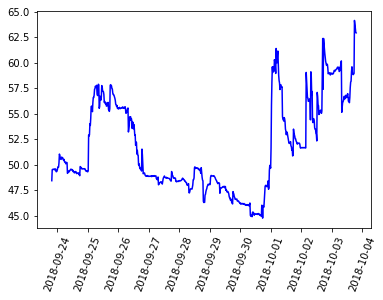

In [33]:
import matplotlib.pyplot as plt

# 2 Days of Data

#print(set1_cleansed["Moisture"].values)
plt.plot(all_cleansed_datasets[0]["Moisture"].values, color='blue')
#plt.plot(all_cleansed_datasets[2]["Temperature"].values, color='green')
#plt.plot(all_cleansed_datasets[2]["Humidity"].values, color='orange')
plt.show()

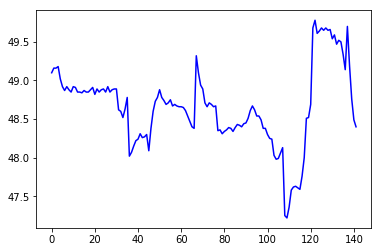

In [9]:
# 2 Days of Data
plt.plot(all_cleansed_datasets[1]["Moisture"].values, color='blue')

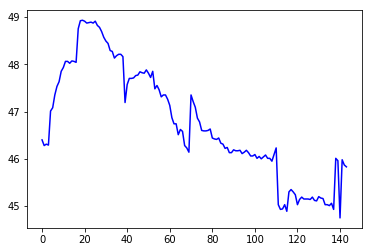

In [10]:
# 2 Days of data
plt.plot(all_cleansed_datasets[2]["Moisture"].values, color='blue')

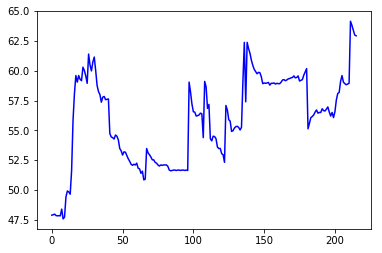

In [11]:
# 3 Days of Data
plt.plot(all_cleansed_datasets[3]["Moisture"].values, color='blue')

Edward's Additions

In [88]:
import sklearn as skl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score

In [59]:
complete_dataset = pd.DataFrame()
for i in all_cleansed_datasets:
    complete_dataset = complete_dataset.append(i, sort=False)
complete_dataset = complete_dataset.reset_index(drop=True)

complete_dataset['Precipitation'] = pd.Series()
# September 23 - October 3 precipitation in mm
precip = [0.0, 1.8, 7.0, 0.6, 0.0, 6.0, 0.2, 8.0, 9.2, 10.6, 0.0]
nums = ['23', '24', '25', '26', '27', '28', '29', '30', '01', '02', '03']
for i in range(len(precip)):
    complete_dataset['Precipitation'].loc[complete_dataset['Datetime'].str.slice(8, 10) == nums[i]] = precip[i]
complete_dataset['Needs Water'] = complete_dataset['Moisture'] < 50
complete_dataset


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Humidity,Temperature,Moisture,Moisture after Watering,Light,Datetime,Precipitation,Needs Water
0,69.2,13.5,48.42,-1,32202.80,2018-09-23 19:40:00,0.0,True
1,74.1,16.0,49.50,-1,60332.57,2018-09-23 20:00:00,0.0,True
2,72.3,16.0,49.48,-1,60332.57,2018-09-23 20:20:00,0.0,True
3,69.0,16.0,49.56,-1,60332.57,2018-09-23 20:40:00,0.0,True
4,75.0,15.0,49.54,-1,57085.82,2018-09-23 21:00:00,0.0,True
5,72.1,16.0,49.54,-1,61150.27,2018-09-23 21:20:00,0.0,True
6,69.0,16.0,49.51,-1,57807.32,2018-09-23 21:40:00,0.0,True
7,67.2,15.2,49.56,-1,61559.13,2018-09-23 22:00:00,0.0,True
8,73.0,15.0,49.47,-1,64421.08,2018-09-23 22:20:00,0.0,True
9,73.0,15.0,49.56,-1,60332.57,2018-09-23 22:40:00,0.0,True


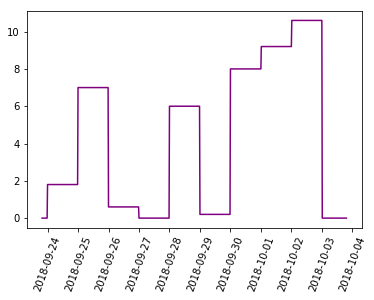

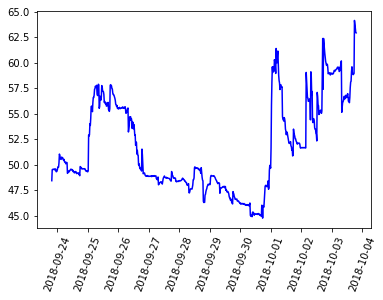

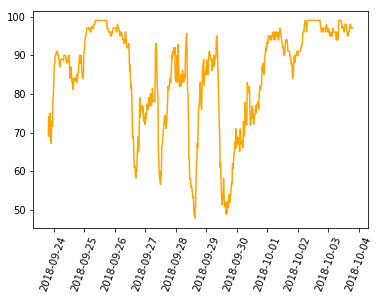

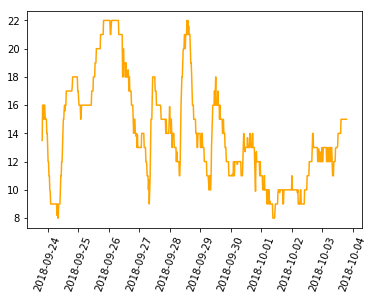

In [56]:
plt.plot(pd.to_datetime(dataset['Datetime']).values, dataset['Precipitation'].values, color='purple')
plt.xticks(rotation=70)
plt.show()
plt.plot(pd.to_datetime(dataset['Datetime']).values, dataset['Moisture'].values, color='blue')
plt.xticks(rotation=70)
plt.show()
plt.plot(pd.to_datetime(dataset['Datetime']).values, dataset['Humidity'].values, color='orange')
plt.xticks(rotation=70)
plt.show()
plt.plot(pd.to_datetime(dataset['Datetime']).values, dataset['Temperature'].values, color='orange')
plt.xticks(rotation=70)
plt.show()

In [94]:
model = LogisticRegression(random_state=1)

In [95]:
predict_method = 'predict'
predictions = cross_val_predict(model, complete_dataset[['Precipitation', 'Humidity']], complete_dataset['Needs Water'], method=predict_method)
if predict_method == 'predict_proba':
    predictions = pd.Series([i[1] for i in predictions])
results = pd.DataFrame([predictions, complete_dataset['Needs Water']]).transpose()
results.columns = ['Predicted', 'Actual']
# results.loc[results['Predicted'] != results['Actual']]
results

,Predicted,Actual
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [96]:
roc_auc_score(results['Predicted'], results['Actual'])

0.7310512969021493